In [158]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split , cross_val_score
from  collections  import Counter 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#### CHARGEMENT DU JEU DE DONNEES 

In [5]:
data  = load_iris()

In [8]:
X , y = data.data, data.target 

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)
    

In [13]:
nb_ligne, nb_colone = X.shape 
print(f"le nombre de ligne {nb_ligne} et le nombre de colone est {nb_colone}")

le nombre de ligne 150 et le nombre de colone est 4


In [128]:
class Knn: 
    def __init__(self, k, dist= "euclidian"): 
        """ 
            parameters :
            -----------
                k : c'est le nombre de voisin 
        """
        if k <1 : 
            self.k = 1 
        else : 
            self.k = k 
            
        self.dist = dist 
    
    def fit(self, x_train_, ytrain): 
        """
            parameters : 
            ------------
                xtrain : les features 
                ytrain : le target 
        """
        self.X = xtrain 
        self.y = ytrain 
    
    def _predict(self, new_obs) : 
        
        
        if self.dist == "euclidian" :
            distance = (np.sqrt((self.X  - new_obs)**2 )).sum(axis = 1 )
            index   = np.argsort(distance)
            labels = self.y[index]
            k_labels = labels[:self.k]
            counter = Counter(k_labels)
            pred = counter.most_common()[0][0]
            return pred 
        
        elif self.dist == "manhatan":
            distance = (np.sqrt(np.abs((self.X  - new_obs) ))).sum(axis = 1 )
            index   = np.argsort(distance)
            labels = self.y[index]
            k_labels = labels[:self.k]
            counter = Counter(k_labels)
            pred = counter.most_common()[0][0]
            return pred 

        
    def predict(self, X): 
        L= [self._predict(x) for x in X ]
        return np.array(L)
    

In [136]:
model = Knn(3, dist="euclidian")


In [137]:
model.fit(X_train, y_train)

In [138]:
(model.predict(X_test) == y_test).sum() / len(y_test)

0.9736842105263158

In [146]:
L_train =[]
L_test =[]

for i in range(1, 40): 
    model = Knn(i)
    model.fit(X, y)
    prediction_train = model.predict(X_train)
    acc_train  = (prediction_train == y_train ).sum()/ y_train.shape[0]
    L_train.append(acc_train) 
    
    prediction_test = model.predict(X_test)
    acc_test  = (prediction_test  == y_test ).sum()/ y_test.shape[0]
    
    L_test.append(acc_test) 
    
    

Text(0, 0.5, 'accuracy')

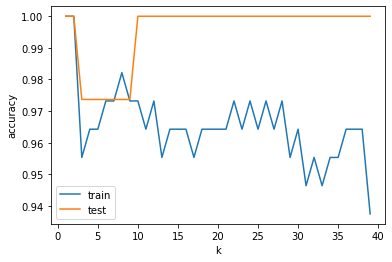

In [154]:
plt.plot(range(1, 40), L_train,label="train" ) 
plt.plot(range(1, 40), L_test , label = "test") 
plt.legend()
plt.xlabel("k")

plt.ylabel("accuracy")

In [157]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [161]:
accuracy_score(y_test, pred)

0.9736842105263158

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
class knn(KNeighborsClassifier): 
    pass 